# Import Library

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns

# Upload Dataset

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving credit_risk_dataset.csv to credit_risk_dataset.csv


In [ ]:
df=pd.read_csv(r'/content/credit_risk_dataset.csv',sep=',')
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


# Data Preprocessing

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [ ]:
df.isna().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [ ]:
# Drop baris dengan nilai 'loan_int_rate'= null
df = df.loc[(df['loan_int_rate'].notnull()) & (df['person_emp_length'].notnull())]

# Cek ukuran data untuk memastikan baris sudah di-drop
df.shape

(28638, 12)

In [ ]:
df.isna().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [ ]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,28638.000000,2.863800e+04,28638.000000,28638.000000,28638.000000,28638.000000,28638.000000,28638.000000
mean,27.727216,6.664937e+04,4.788672,9656.493121,11.039867,0.216600,0.169488,5.793736
std,6.310441,6.235645e+04,4.154627,6329.683361,3.229372,0.411935,0.106393,4.038483
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.948000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.595600e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,8.000000e+04,7.000000,12500.000000,13.480000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [ ]:
loan_percent_income = (df.loan_percent_income == 0).sum()

print("Nilai 0 di kolom loan_percent_income ada: ", loan_percent_income)

Nilai 0 di kolom loan_percent_income ada:  8


In [ ]:
df.loc[(df['loan_percent_income']==0)]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
17834,34,948000,MORTGAGE,18.0,PERSONAL,B,2000,9.99,0,0.0,N,7
18917,35,510000,RENT,1.0,PERSONAL,C,1800,13.48,0,0.0,N,6
27877,30,522000,MORTGAGE,11.0,HOMEIMPROVEMENT,A,2500,7.43,0,0.0,N,9
30049,42,2039784,RENT,0.0,VENTURE,C,8450,12.29,0,0.0,Y,15
31916,43,780000,MORTGAGE,2.0,HOMEIMPROVEMENT,A,1000,8.94,0,0.0,N,11
31922,47,1362000,MORTGAGE,9.0,VENTURE,A,6600,7.74,0,0.0,N,17
31924,44,1440000,MORTGAGE,7.0,DEBTCONSOLIDATION,A,6400,7.40,0,0.0,N,15
32297,144,6000000,MORTGAGE,12.0,PERSONAL,C,5000,12.73,0,0.0,N,25


In [ ]:
# Mengganti baris dengan nilai 'loan_percent_income' = 0 dengan nilai hasil operasi kolom loan_amnt dibagi kolom person_income
df.loc[df['loan_percent_income'] == 0, 'loan_percent_income'] = df['loan_amnt'] / df['person_income']

In [ ]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,28638.000000,2.863800e+04,28638.000000,28638.000000,28638.000000,28638.000000,28638.000000,28638.000000
mean,27.727216,6.664937e+04,4.788672,9656.493121,11.039867,0.216600,0.169489,5.793736
std,6.310441,6.235645e+04,4.154627,6329.683361,3.229372,0.411935,0.106391,4.038483
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000833,2.000000
25%,23.000000,3.948000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.595600e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,8.000000e+04,7.000000,12500.000000,13.480000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [ ]:
df.shape

(28638, 12)

# Menangani Outlier

<Axes: xlabel='person_age'>

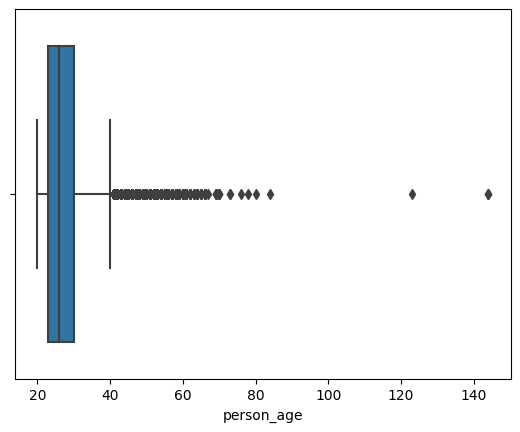

In [ ]:
sns.boxplot(x=df['person_age'])

<Axes: xlabel='person_emp_length'>

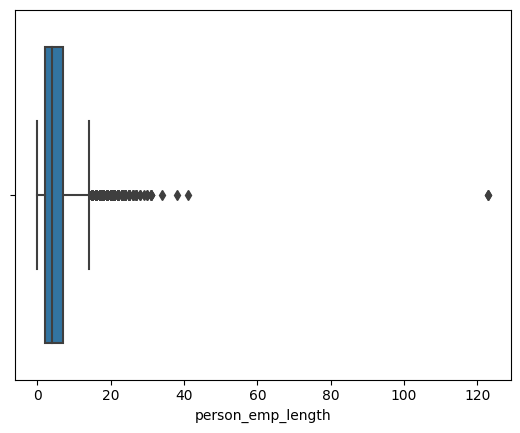

In [ ]:
sns.boxplot(x=df['person_emp_length'])

<Axes: xlabel='loan_amnt'>

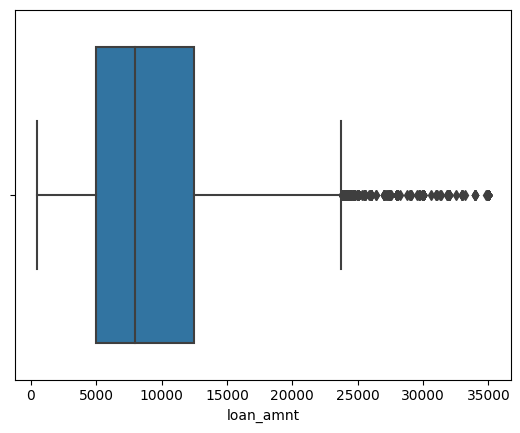

In [ ]:
sns.boxplot(x=df['loan_amnt'])

<Axes: xlabel='loan_percent_income'>

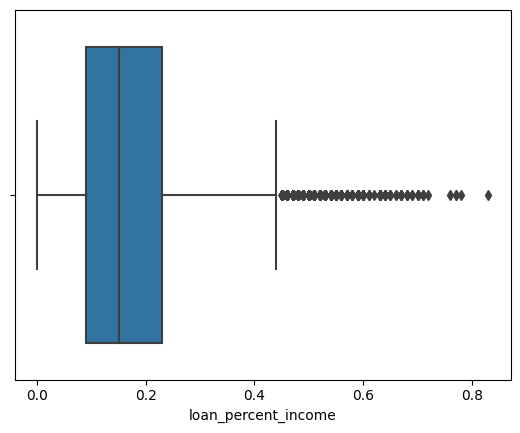

In [ ]:
sns.boxplot(x=df['loan_percent_income'])

<Axes: xlabel='loan_status'>

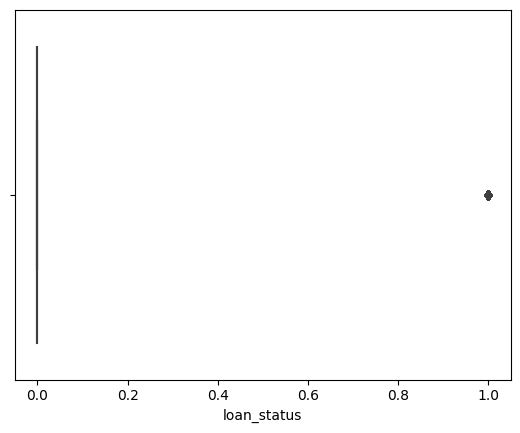

In [ ]:
sns.boxplot(x=df['loan_status'])

In [ ]:
df.shape

(28638, 12)

<Axes: xlabel='loan_percent_income'>

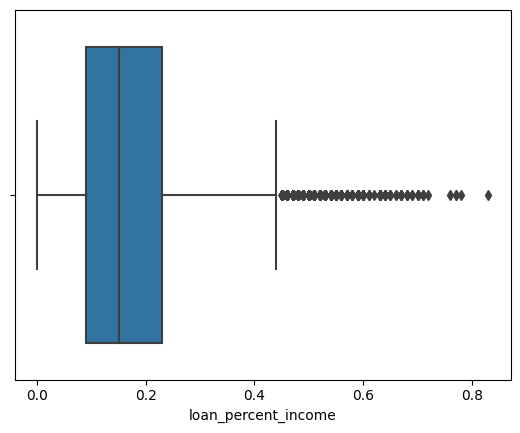

In [ ]:
sns.boxplot(x=df['loan_percent_income'])

In [ ]:
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [ ]:
numerical = ['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']

In [ ]:
df_num = df[numerical]
Q1 = df_num.quantile(0.25)
Q3 = df_num.quantile(0.75)
IQR=Q3-Q1
df=df[~((df_num<(Q1-1.5*IQR))|(df_num>(Q3+1.5*IQR))).any(axis=1)]

# Cek ukuran dataset setelah kita drop outliers
df.shape

(23750, 12)

# Exploratory Data Analysis

In [ ]:
numerical_features = ['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_status', 'loan_percent_income', 'cb_person_cred_hist_length']
categorical_features = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']

          jumlah sampel  persentase
RENT              12593        53.0
MORTGAGE           9284        39.1
OWN                1799         7.6
OTHER                74         0.3


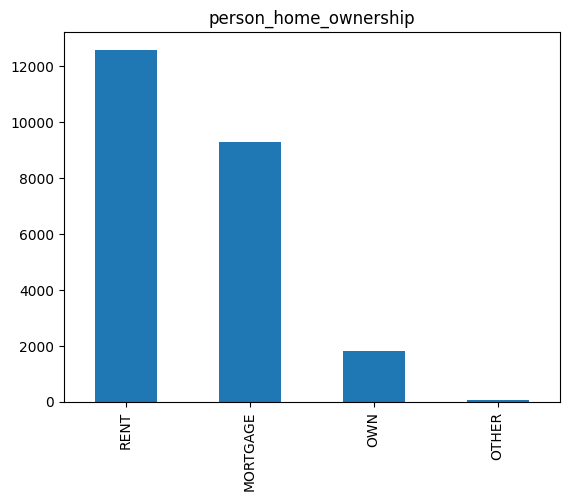

In [ ]:
feature = categorical_features[0]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
df_1 = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df_1)
count.plot(kind='bar', title=feature);

                   jumlah sampel  persentase
EDUCATION                   4897        20.6
MEDICAL                     4427        18.6
VENTURE                     4162        17.5
PERSONAL                    3953        16.6
DEBTCONSOLIDATION           3773        15.9
HOMEIMPROVEMENT             2538        10.7


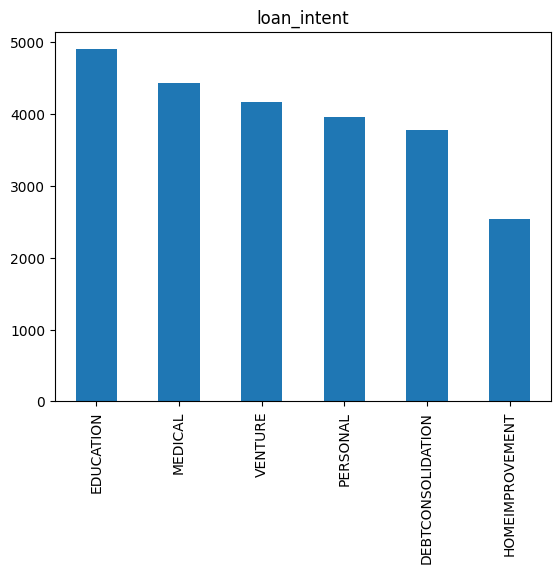

In [ ]:
feature = categorical_features[1]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
df_1 = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df_1)
count.plot(kind='bar', title=feature);

   jumlah sampel  persentase
A           8032        33.8
B           7488        31.5
C           4878        20.5
D           2540        10.7
E            660         2.8
F            124         0.5
G             28         0.1


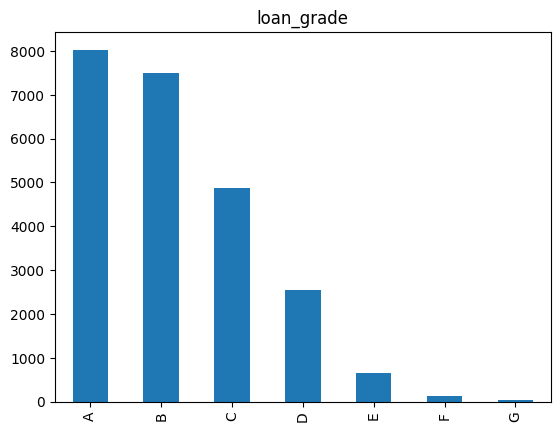

In [ ]:
feature = categorical_features[2]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
df_1 = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df_1)
count.plot(kind='bar', title=feature);

   jumlah sampel  persentase
N          19596        82.5
Y           4154        17.5


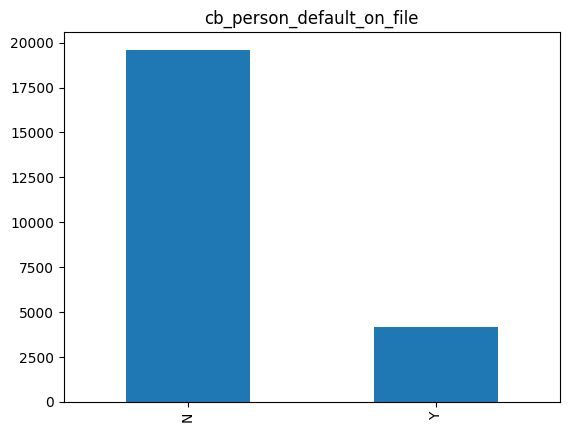

In [ ]:
feature = categorical_features[3]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
df_1 = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df_1)
count.plot(kind='bar', title=feature);

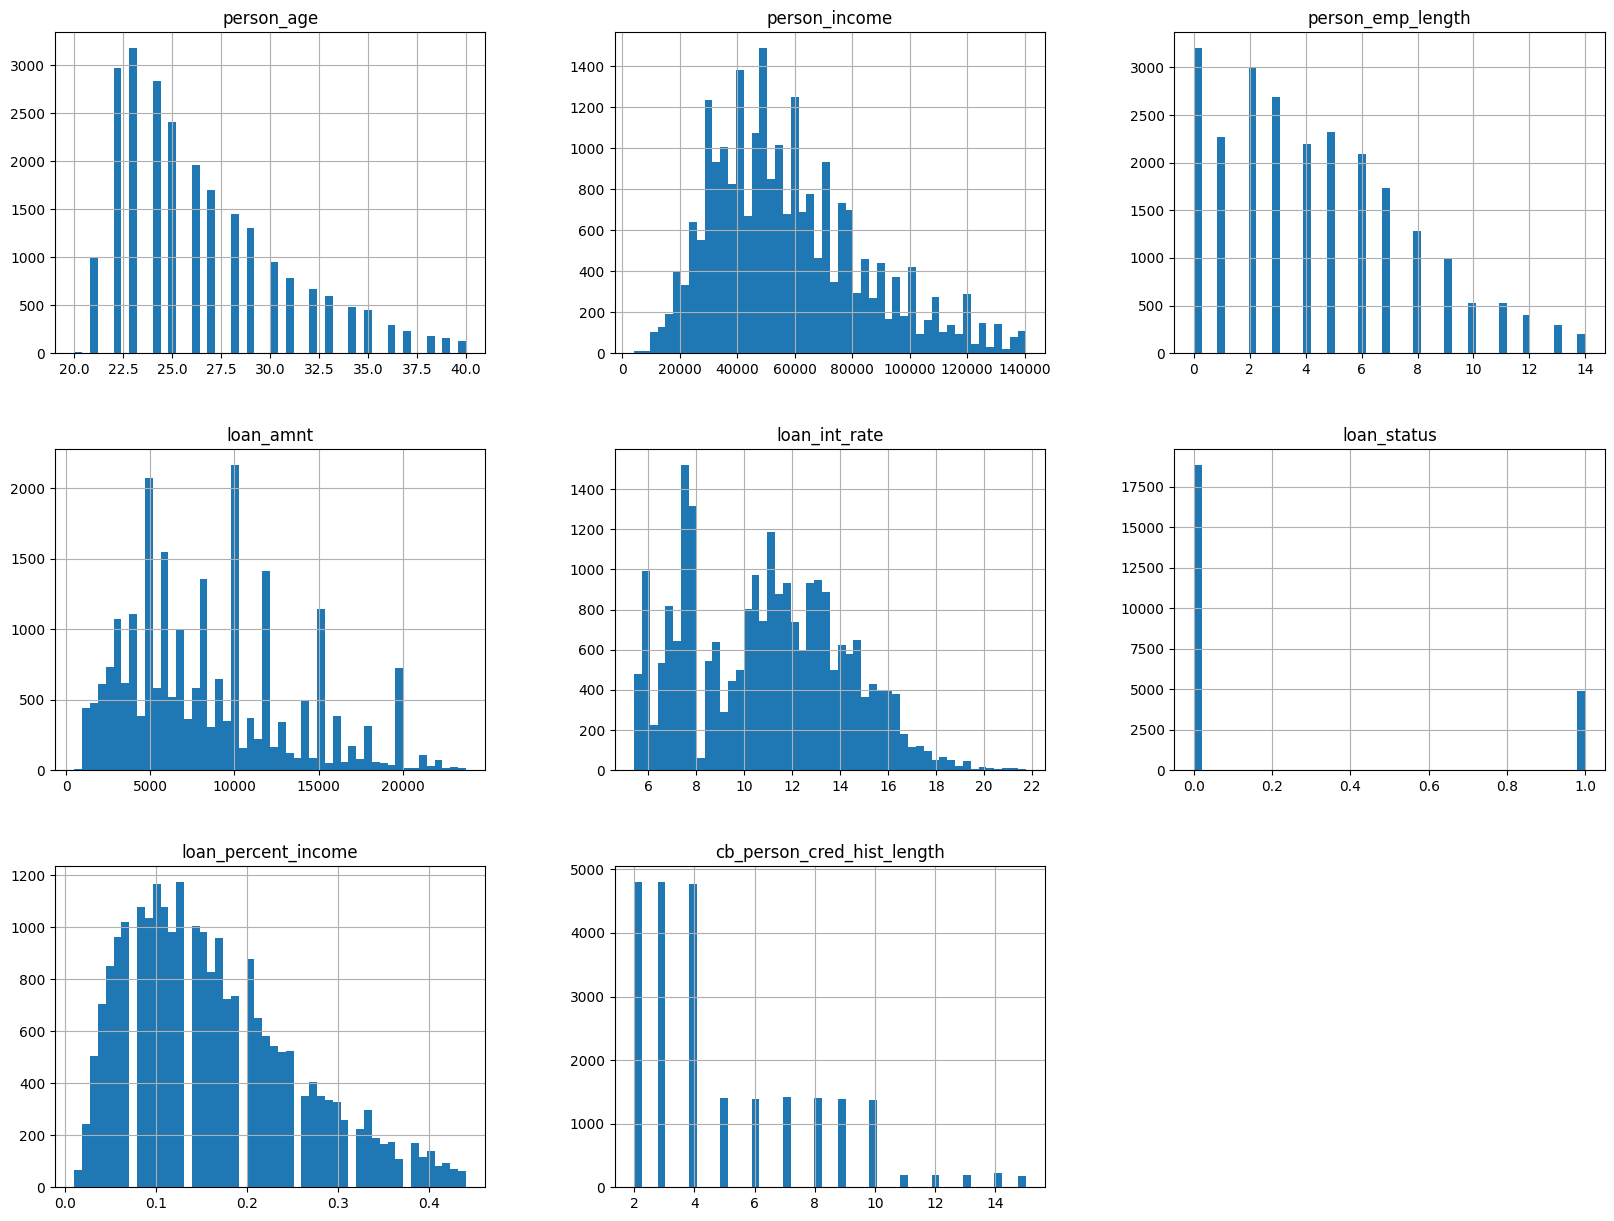

In [ ]:
df.hist(bins=50, figsize=(20,15))
plt.show()

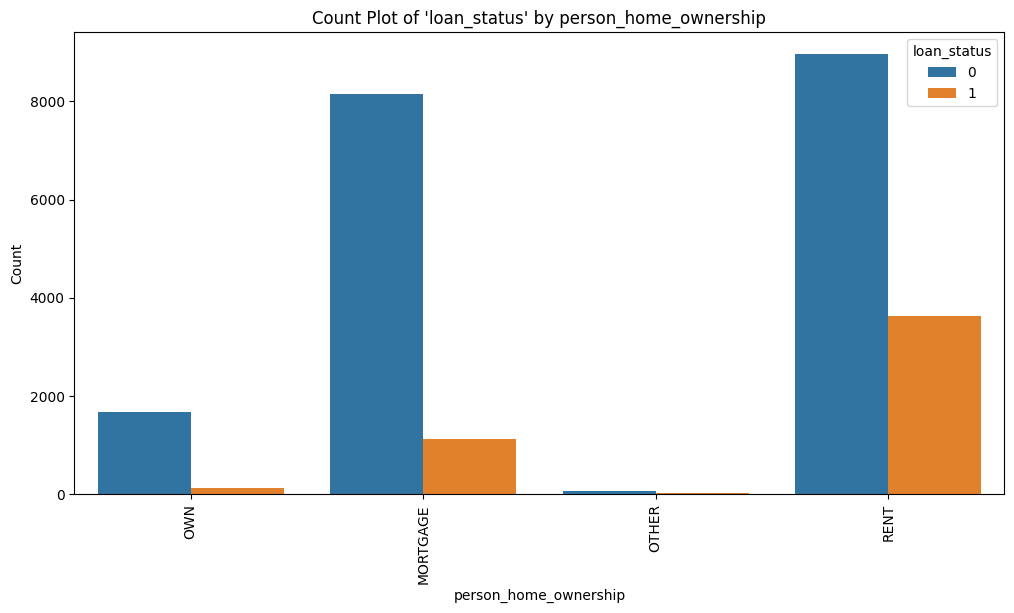

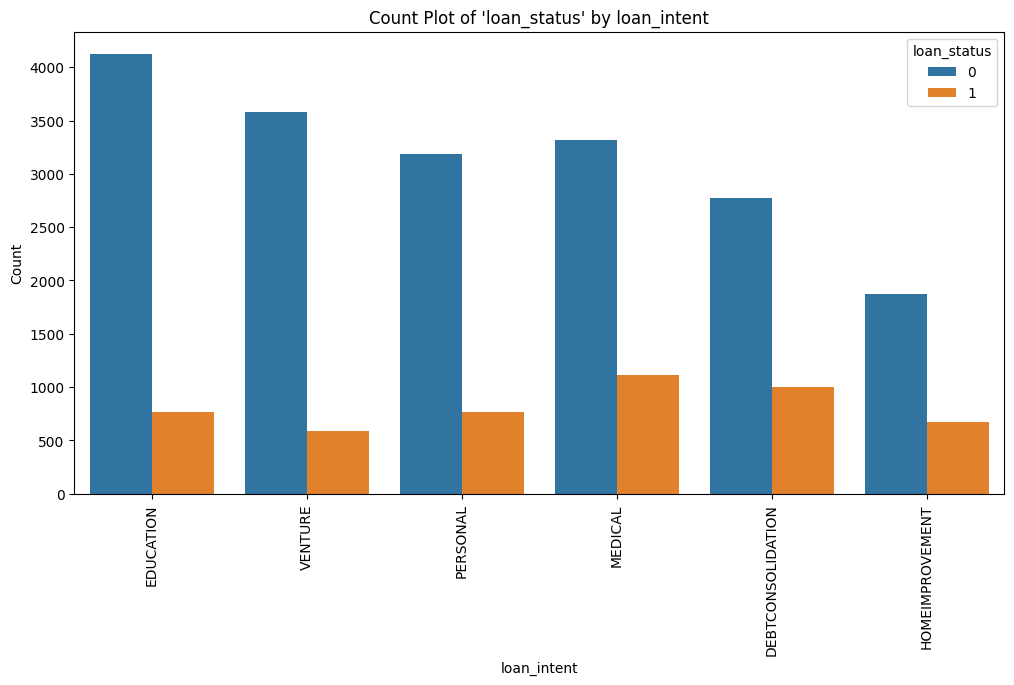

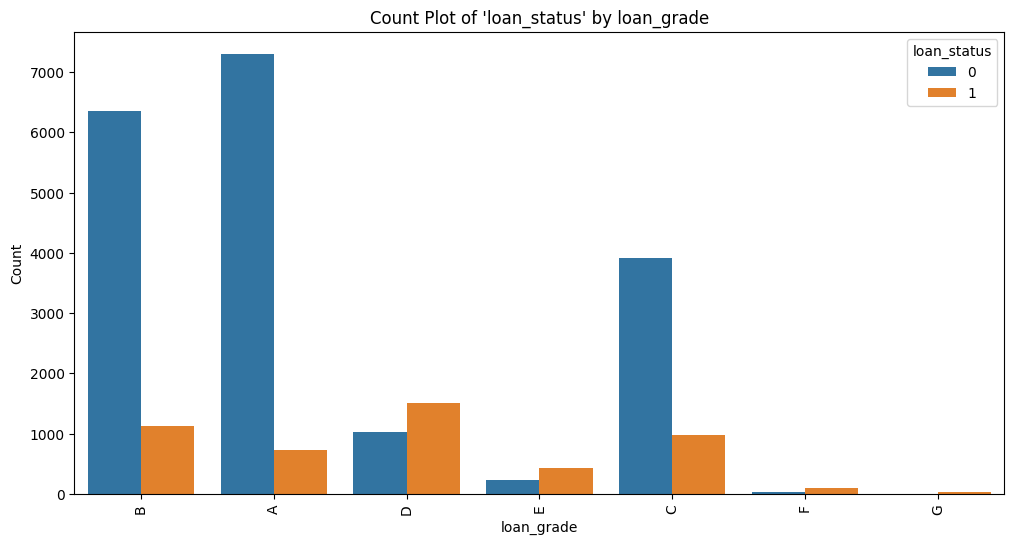

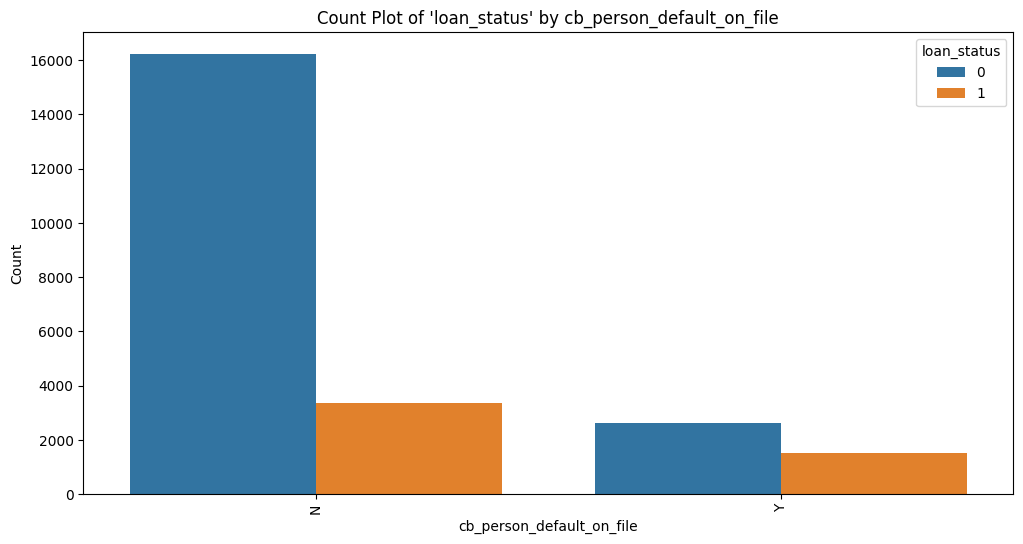

In [ ]:
cat_features = df.select_dtypes(include='object').columns.to_list()

for col in cat_features:
    plt.figure(figsize=(12, 6))
    sns.countplot(x=col, hue="loan_status", data=df)
    plt.title("Count Plot of 'loan_status' by {}".format(col))
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=90)
    plt.show()


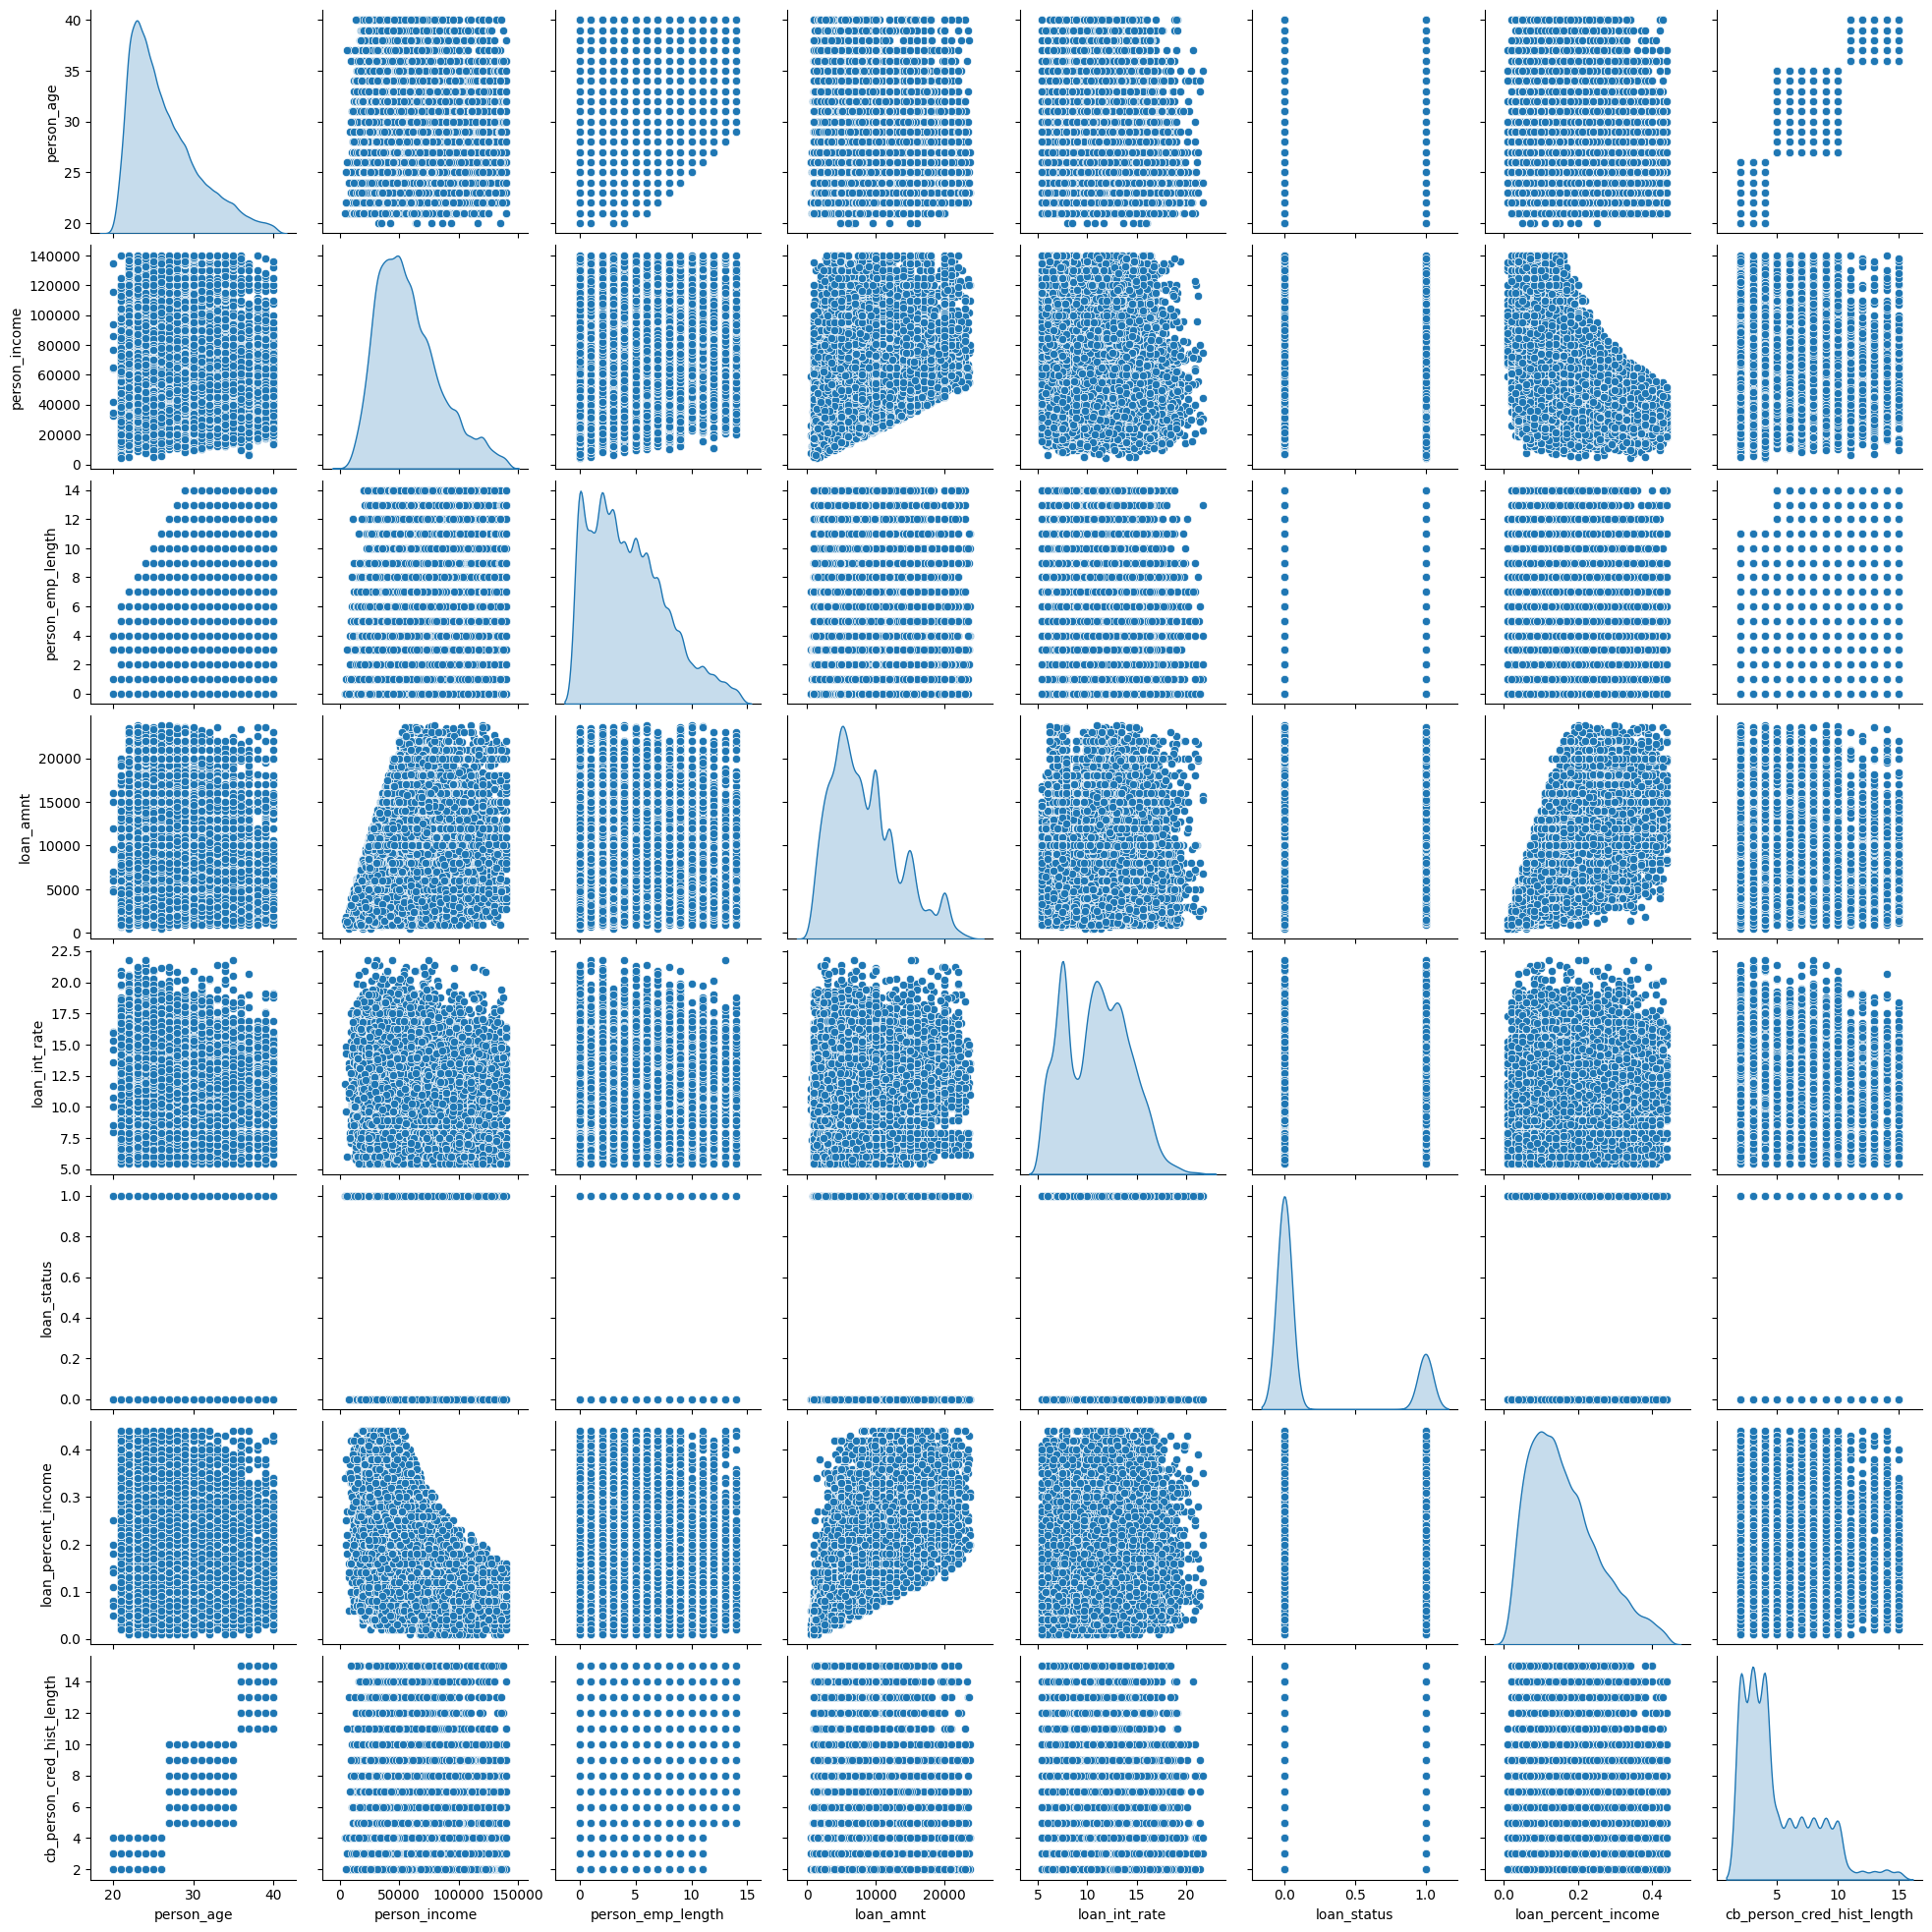

In [ ]:
# Mengamati hubungan antar fitur numerik dengan fungsi pairplot()
sns.pairplot(df, diag_kind = 'kde')

<ipython-input-32-b0df64929d97>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr().round(2)


Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

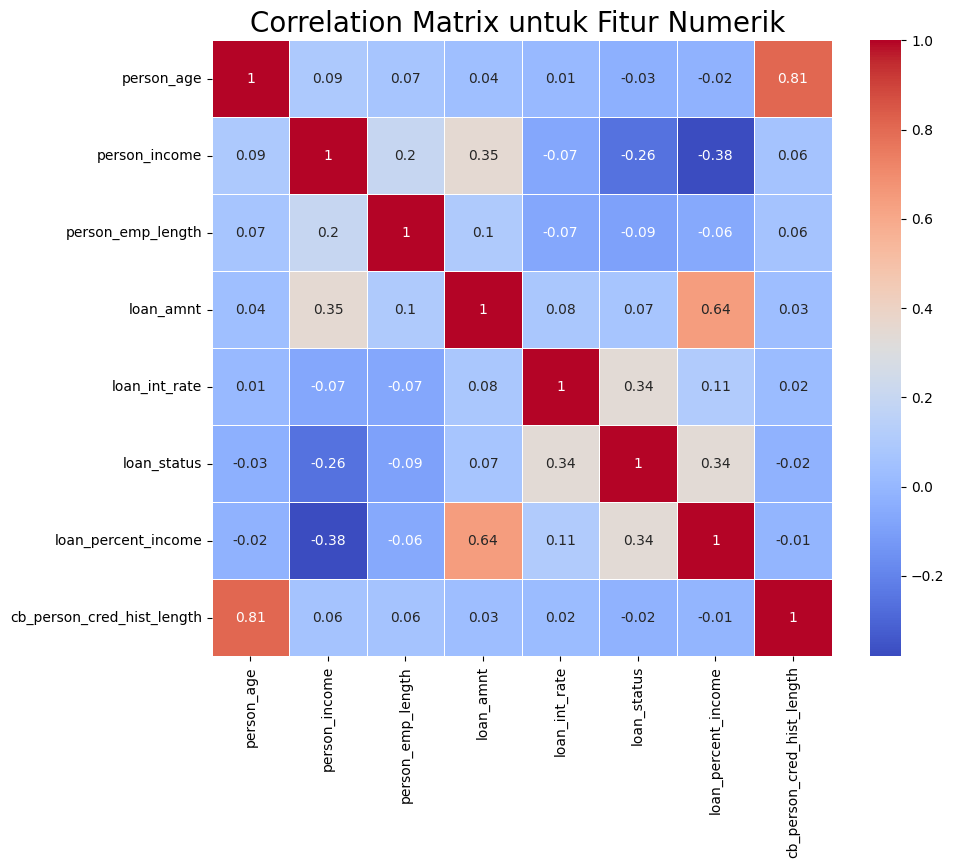

In [ ]:
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr().round(2)

# Untuk menge-print nilai di dalam kotak, gunakan parameter anot=True
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)

# Feature Encoding

In [ ]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2
9,21,10000,OWN,6.0,VENTURE,D,1600,14.74,1,0.16,N,3
19,24,10800,MORTGAGE,8.0,EDUCATION,B,1750,10.99,1,0.16,N,2
23,24,10980,OWN,0.0,PERSONAL,A,1500,7.29,0,0.14,N,3


In [ ]:
from sklearn.preprocessing import  OneHotEncoder
df = pd.concat([df, pd.get_dummies(df['person_home_ownership'], prefix='person_home_ownership')],axis=1)
df = pd.concat([df, pd.get_dummies(df['loan_intent'], prefix='loan_intent')],axis=1)
df.drop(['person_home_ownership','loan_intent'], axis=1, inplace=True)
df.head()

,person_age,person_income,person_emp_length,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
1,21,9600,5.0,B,1000,11.14,0,0.10,N,2,0,0,1,0,0,1,0,0,0,0
5,21,9900,2.0,A,2500,7.14,1,0.25,N,2,0,0,1,0,0,0,0,0,0,1
9,21,10000,6.0,D,1600,14.74,1,0.16,N,3,0,0,1,0,0,0,0,0,0,1
19,24,10800,8.0,B,1750,10.99,1,0.16,N,2,1,0,0,0,0,1,0,0,0,0
23,24,10980,0.0,A,1500,7.29,0,0.14,N,3,0,0,1,0,0,0,0,0,1,0


In [ ]:
from sklearn.preprocessing import LabelEncoder
df['loan_grade']=LabelEncoder().fit_transform(df['loan_grade'])
df['cb_person_default_on_file']=LabelEncoder().fit_transform(df['cb_person_default_on_file'])
df.head()

,person_age,person_income,person_emp_length,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
1,21,9600,5.0,1,1000,11.14,0,0.10,0,2,0,0,1,0,0,1,0,0,0,0
5,21,9900,2.0,0,2500,7.14,1,0.25,0,2,0,0,1,0,0,0,0,0,0,1
9,21,10000,6.0,3,1600,14.74,1,0.16,0,3,0,0,1,0,0,0,0,0,0,1
19,24,10800,8.0,1,1750,10.99,1,0.16,0,2,1,0,0,0,0,1,0,0,0,0
23,24,10980,0.0,0,1500,7.29,0,0.14,0,3,0,0,1,0,0,0,0,0,1,0


# Imbalance Dataset

In [ ]:
df.groupby(['loan_status']).size()

loan_status
0    18856
1     4894
dtype: int64

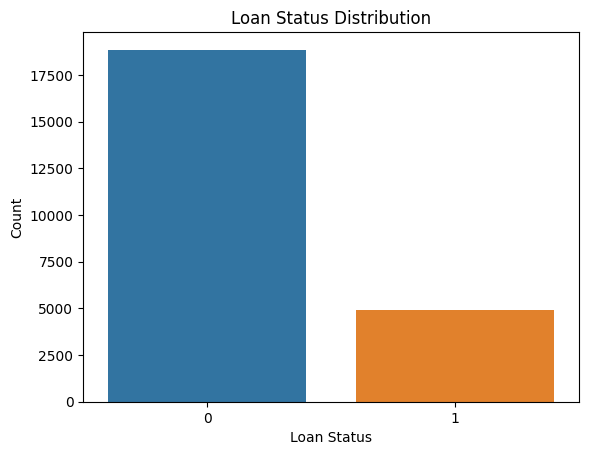

In [ ]:
loan_status_counts = df.groupby(['loan_status']).size()

sns.barplot(x=loan_status_counts.index, y=loan_status_counts.values)
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.title('Loan Status Distribution')
plt.show()

In [ ]:
df.head()

,person_age,person_income,person_emp_length,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
1,21,9600,5.0,1,1000,11.14,0,0.10,0,2,0,0,1,0,0,1,0,0,0,0
5,21,9900,2.0,0,2500,7.14,1,0.25,0,2,0,0,1,0,0,0,0,0,0,1
9,21,10000,6.0,3,1600,14.74,1,0.16,0,3,0,0,1,0,0,0,0,0,0,1
19,24,10800,8.0,1,1750,10.99,1,0.16,0,2,1,0,0,0,0,1,0,0,0,0
23,24,10980,0.0,0,1500,7.29,0,0.14,0,3,0,0,1,0,0,0,0,0,1,0


In [ ]:
X=df.drop(['loan_status'],axis=1)
y=df['loan_status']

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

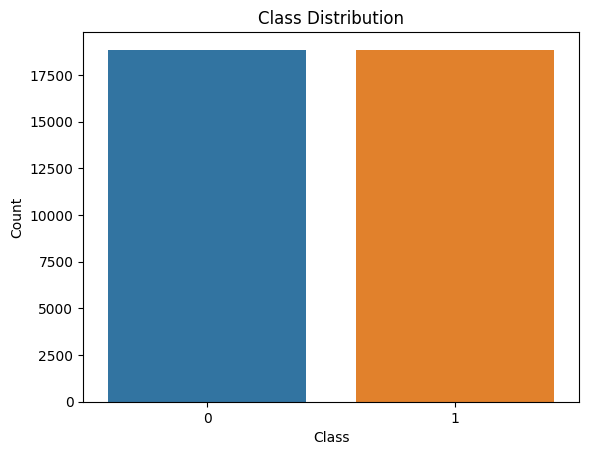

In [ ]:
from collections import Counter

counter = Counter(y_resampled)
labels, values = zip(*counter.items())

sns.countplot(x=y_resampled)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()

# Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

X_resampled_train, X_resampled_test, y_resampled_train, y_resampled_test = train_test_split(X_resampled, y_resampled, test_size = 0.1, random_state = 123)

In [ ]:
print(f'Total # of sample in whole dataset: {len(X_resampled)}')
print(f'Total # of sample in train dataset: {len(X_resampled_train)}')
print(f'Total # of sample in test dataset: {len(X_resampled_test)}')

Total # of sample in whole dataset: 37712
Total # of sample in train dataset: 33940
Total # of sample in test dataset: 3772


# Feature Scaling

In [ ]:
df.head()

,person_age,person_income,person_emp_length,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
1,21,9600,5.0,1,1000,11.14,0,0.10,0,2,0,0,1,0,0,1,0,0,0,0
5,21,9900,2.0,0,2500,7.14,1,0.25,0,2,0,0,1,0,0,0,0,0,0,1
9,21,10000,6.0,3,1600,14.74,1,0.16,0,3,0,0,1,0,0,0,0,0,0,1
19,24,10800,8.0,1,1750,10.99,1,0.16,0,2,1,0,0,0,0,1,0,0,0,0
23,24,10980,0.0,0,1500,7.29,0,0.14,0,3,0,0,1,0,0,0,0,0,1,0


In [ ]:
from sklearn.preprocessing import StandardScaler

numerical_features = ['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']
scaler = StandardScaler()
scaler.fit(X_resampled_train[numerical_features])
X_resampled_train[numerical_features] = scaler.transform(X_resampled_train.loc[:, numerical_features])
X_resampled_train[numerical_features].head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
1187,-0.280060,-0.884905,0.284073,-1.010409,0.216467,-0.616847,-0.277052
28379,-1.037471,-0.037680,0.601500,0.249816,0.670286,0.048433,-0.997516
11849,-0.280060,-0.884905,-0.033354,0.249816,0.901891,1.378991,-0.997516
24382,-0.785001,-1.540079,-1.303062,-0.833190,0.073561,1.558046,-0.277052
1548,-0.785001,-1.115966,-1.303062,-1.227011,-0.005749,-0.806926,-0.997516


In [ ]:
X_resampled_train[numerical_features].describe().round(4)

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
count,33940.0000,33940.0000,33940.0000,33940.0000,33940.0000,33940.0000,33940.0000
mean,-0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
std,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
min,-1.5424,-1.8784,-1.3031,-1.6208,-1.9744,-1.6623,-0.9975
25%,-0.7850,-0.7463,-0.7140,-0.7382,-0.7538,-0.8069,-0.6373
50%,-0.2801,-0.1725,-0.1615,-0.1440,0.0458,-0.1416,-0.2771
75%,0.4774,0.5400,0.6015,0.6436,0.7798,0.7137,0.4434
max,3.5070,3.3628,3.1409,2.9573,3.1334,2.4244,3.6855


# Model KNN

In [ ]:
# Siapkan dataframe untuk analisis model
models = pd.DataFrame(index=['train_accuracy', 'test_accuracy'],
                      columns=['KNN', 'RandomForest', 'Boosting', 'SVC'])

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_resampled_train, y_resampled_train)

y_pred_train = knn.predict(X_resampled_train)
train_accuracy = accuracy_score(y_true=y_resampled_train, y_pred=y_pred_train)

models.loc['train_accuracy', 'knn'] = train_accuracy

# Model RF

In [ ]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=50, max_depth=16, random_state=55, n_jobs=-1)
RF.fit(X_resampled_train, y_resampled_train)

y_pred_train = RF.predict(X_resampled_train)
train_accuracy = accuracy_score(y_true=y_resampled_train, y_pred=y_pred_train)

models.loc['train_accuracy', 'RandomForest'] = train_accuracy

# MODEL SVC

In [ ]:
from sklearn.svm import SVC

SVC = SVC()
SVC.fit(X_resampled_train, y_resampled_train)

y_pred_train = SVC.predict(X_resampled_train)
train_accuracy = accuracy_score(y_true=y_resampled_train, y_pred=y_pred_train)

models.loc['train_accuracy', 'SVC'] = train_accuracy

# Evaluasi Model

In [ ]:
# Lakukan scaling terhadap fitur numerik pada X_test sehingga memiliki rata-rata=0 dan varians=1
X_resampled_test.loc[:, numerical_features] = scaler.transform(X_resampled_test[numerical_features])

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Buat dictionary untuk setiap algoritma yang digunakan
model_dict = {'KNN': knn, 'RF': RF, 'SVC': SVC}

# Buat dataframe untuk menyimpan nilai presisi, recall, f1-score, dan akurasi
evaluation_train = pd.DataFrame(columns=['accuracy', 'precision', 'recall', 'f1-score'], index=['KNN', 'RF', 'SVC'])
evaluation_test = pd.DataFrame(columns=['accuracy', 'precision', 'recall', 'f1-score'], index=['KNN', 'RF', 'SVC'])

# Hitung akurasi, presisi, recall, dan f1-score masing-masing algoritma pada data train dan test
for name, model in model_dict.items():
    y_pred_train = model.predict(X_resampled_train)
    y_pred_test = model.predict(X_resampled_test)
    accuracy_train = accuracy_score(y_true=y_resampled_train, y_pred=y_pred_train)
    precision_train = precision_score(y_true=y_resampled_train, y_pred=y_pred_train)
    recall_train = recall_score(y_true=y_resampled_train, y_pred=y_pred_train)
    f1_train = f1_score(y_true=y_resampled_train, y_pred=y_pred_train)
    accuracy_test = accuracy_score(y_true=y_resampled_test, y_pred=y_pred_test)
    precision_test = precision_score(y_true=y_resampled_test, y_pred=y_pred_test)
    recall_test = recall_score(y_true=y_resampled_test, y_pred=y_pred_test)
    f1_test = f1_score(y_true=y_resampled_test, y_pred=y_pred_test)
    evaluation_train.loc[name] = [accuracy_train, precision_train, recall_train, f1_train]
    evaluation_test.loc[name] = [accuracy_test, precision_test, recall_test, f1_test]

# Gabungkan dataframe accuracy, evaluation_train, dan evaluation_test
results = pd.concat([evaluation_train, evaluation_test], keys=['Train', 'Test'], axis=1)

# Tampilkan hasil evaluasi
results

Train                                    Test                      \
     accuracy precision    recall  f1-score  accuracy precision    recall   
KNN  0.926576   0.94675  0.903713  0.924731  0.911188  0.934615  0.887324   
RF    0.97746  0.998152  0.956609  0.976939  0.946713  0.988055  0.906103   
SVC  0.934266  0.979588   0.88677  0.930871  0.926034   0.97561  0.876369   

               
     f1-score  
KNN  0.910356  
RF   0.945306  
SVC  0.923331